<a href="https://colab.research.google.com/github/friedelj/AAI-510-TEAM-03/blob/main/JFriedel_CV_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Joseph Friedel--------------------Assignment#2-----------------------CNN and Pre-Trained Models----------------11/4/24

Part I CNN
-For the first part of the assignment, we want to work on a black and white image which is an OCR (Optical Character Recognition). Optical character recognition or optical character reader is the electronic or mechanical conversion of images of typed, handwritten, or printed text into machine-
encoded text, whether from a scanned document, a photo of a document, a scene-photo or from subtitle text superimposed on an image

In [1]:
import tensorflow as tf
print(tf.version.VERSION)
device_name=tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

2.17.0
Found GPU at: /device:GPU:0


In [3]:
import keras
import tensorflow as tf
from tensorflow.keras.layers import MaxPooling2D
from keras.datasets import mnist, cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.layers import Dense
from keras import optimizers
from tensorflow.keras.optimizers import SGD
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import backend as K

In [4]:
import urllib.request

# URL of the MNIST dataset
url = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz"
# File path where the dataset will be saved
filename = "mnist.npz"

# Download the dataset
urllib.request.urlretrieve(url, filename)

print("Download complete. Saved as", filename)

Download complete. Saved as mnist.npz


In [5]:
# Create train and test dataset
import numpy as np

with np.load("mnist.npz") as data:
    x_train, y_train = data['x_train'], data['y_train']
    x_test, y_test = data['x_test'], data['y_test']

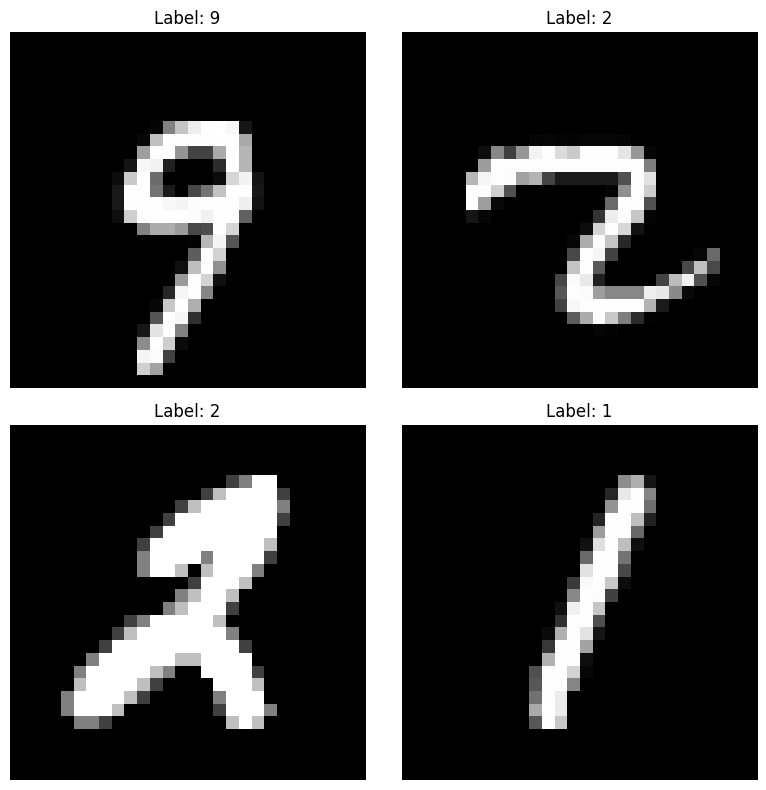

In [6]:
#1.a. Create the visualization here
# Let's look into the dataset by visualizing some data opints
import matplotlib.pyplot as plt

# Load the MNIST dataset
with np.load("mnist.npz") as data:
    x_train, y_train = data['x_train'], data['y_train']

# Plot 4 random samples from the dataset
plt.figure(figsize=(8, 8))
for i in range(4):
    # Choose a random index
    index = np.random.randint(0, x_train.shape[0])

    # Display the image
    plt.subplot(2, 2, i + 1)
    plt.imshow(x_train[index], cmap='gray')
    plt.title(f"Label: {y_train[index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [7]:
#preprocessing
# Kears allows us to add the number of channels either to the beggining of shape or the end of it
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [8]:
# Normalize inputs from 0-255 to 0-1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [9]:
from tensorflow.keras.utils import to_categorical

# Encode the output labels using one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

1.b. Create a CNN model with 4 convolution layers in which two of them have 32 and two of them have 64 filters. The fully connected layer has one hidden layer (512 nodes). Draw the Learning curve.  Batch size=128 and epochs=20

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 107ms/step - accuracy: 0.7701 - loss: 0.6982 - val_accuracy: 0.9805 - val_loss: 0.0639
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 109ms/step - accuracy: 0.9779 - loss: 0.0731 - val_accuracy: 0.9859 - val_loss: 0.0463
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 104ms/step - accuracy: 0.9847 - loss: 0.0498 - val_accuracy: 0.9843 - val_loss: 0.0480
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 103ms/step - accuracy: 0.9876 - loss: 0.0407 - val_accuracy: 0.9907 - val_loss: 0.0293
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 100ms/step - accuracy: 0.9906 - loss: 0.0287 - val_accuracy: 0.9877 - val_loss: 0.0422
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 52s 111ms/step - accuracy: 0.9909 - loss: 0.0284 - val_accuracy: 0.9865 - val_loss: 0.0465
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 108ms/step - accuracy: 0.9922 - loss: 0.0257 - val_accuracy: 0.9924 - val_loss: 0.0279
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 103ms/step - accuracy: 0.9934 - loss: 0

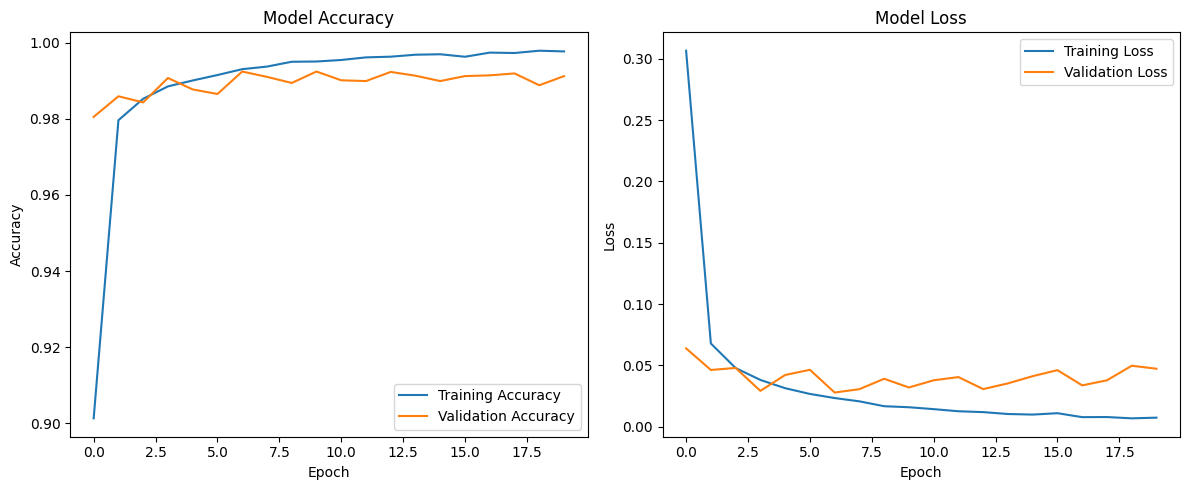

In [10]:
#1.b.
# Create model here
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# Define the CNN model
model = Sequential()

# First convolutional layer (32 filters)
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer (32 filters)
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional layer (64 filters) - No pooling layer here to maintain size
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# Fourth convolutional layer (64 filters) - No pooling layer here to maintain size
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# Flatten and add fully connected layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization

# Output layer (10 classes for digits 0-9)
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_test, y_test))

# Plot the learning curve
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

What is your understanding from learning curve?
It's a good model.  Over .98 on Trainig and Validation accuracy.  Similarly Loss is less than 0.05 on both Training and Validation.  

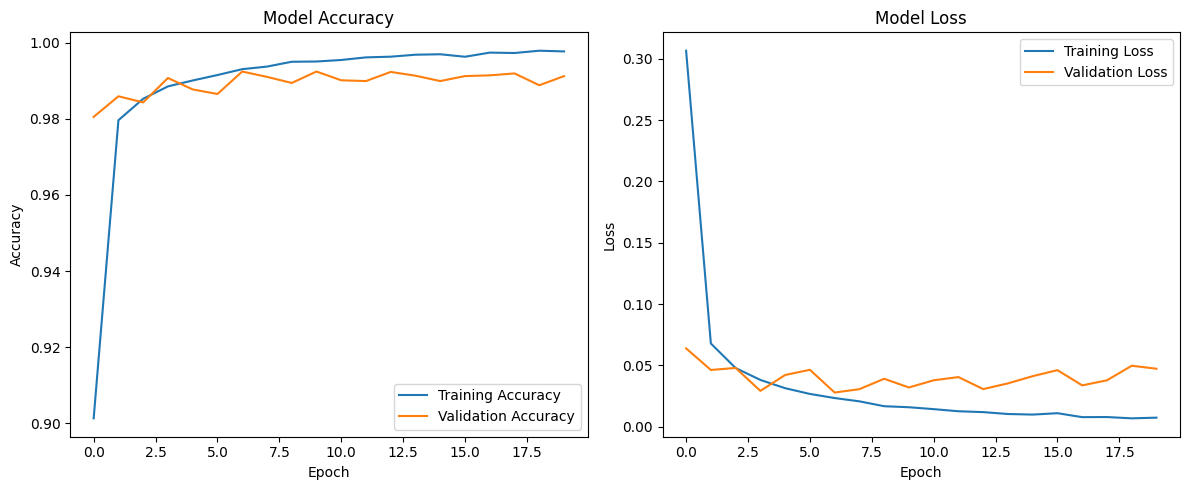

In [11]:
# Draw Learning curve
  #Create a function to draw learning curves
  # This will help you to just call this function in future for drawing the learning curves

# Define the learning curve function
def learning_curve(hist):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(hist.history['accuracy'], label='Training Accuracy')
    plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(hist.history['loss'], label='Training Loss')
    plt.plot(hist.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

# Call the learning curve function
learning_curve(history)

## What is your understanding from the learning curve?
# They look fine. There is a little bit of overfitting but nothing to be worried about.
I agree.  0.98 accuracy is really good.  The lower validation accuracy shows slight overfitting.  I would try fewer epochs.

Part 2- CIFAR10
- For the next part we work on a CIFAR-10 Dataset. This is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories. You can get more information about the dataset here: CIFAR-10 and CIFAR-100 datasets (toronto.edu). The difference this time is that this is a colorful dataset.


In [12]:
import urllib.request
import tarfile

# CIFAR-10 dataset URL
url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
filename = "cifar-10-python.tar.gz"

# Download the dataset
urllib.request.urlretrieve(url, filename)
print("Download complete.")

# Extract the downloaded file
with tarfile.open(filename, "r:gz") as tar:
    tar.extractall()
    print("Extraction complete.")

Download complete.
Extraction complete.


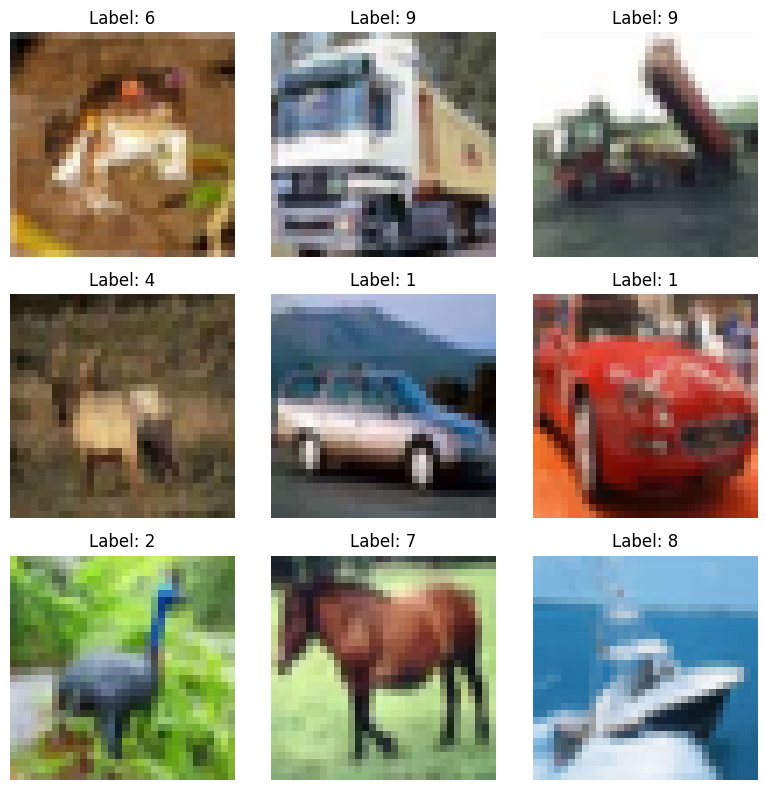

In [13]:
# Plot the first 9 images from the dataset.
import pickle
import matplotlib.pyplot as plt
import numpy as np

# Function to load a batch of CIFAR-10 data
def load_cifar_batch(filename):
    with open(filename, 'rb') as f:
        data_dict = pickle.load(f, encoding='bytes')
        images = data_dict[b'data']
        labels = data_dict[b'labels']
        images = images.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)  # Convert to (num_samples, 32, 32, 3)
        return images, labels

# Load the first batch of the CIFAR-10 dataset
images, labels = load_cifar_batch('cifar-10-batches-py/data_batch_1')

# Plot the first 9 images
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f"Label: {labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

2.b) Apply the pre-processing algorithms that we discussed last week. The augmented images are supposed to be seared by 20%, zoomed by 20%, and horizontally flipped. Now, design a CNN model with 4 convolution layers in which two of them have 32 and two of them have 64 filters. The fully connected
layer has two hidden layers (512 and 256 nodes respectively). Draw the Learning curve. What is your understanding of the learning curve? Batch size=128 and epochs=20. Apply the model on the processed data. For the optimizer, use Stochastic gradient descent with a learning rate of 0.005, decay of 1x10-6,
momentum of 0.9.


In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [15]:
# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [16]:
# Normalize pixel values to 0-1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [17]:
# Convert labels to categorical format
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [18]:
# Image augmentation
datagen = ImageDataGenerator(
    shear_range=0.2,  # Shear by 20%
    zoom_range=0.2,   # Zoom by 20%
    horizontal_flip=True  # Horizontally flip images
)

In [19]:
# Fit the data generator to training data
datagen.fit(x_train)

In [43]:
# Define the CNN model
model = Sequential()

In [45]:
# First convolutional layer (32 filters) with padding
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=x_train.shape[1:], padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))  # Pooling here

In [47]:
# Second convolutional layer (32 filters) with padding
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))  # Pooling here

In [48]:
# Third convolutional layer (64 filters) with padding
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))

In [49]:
# Third convolutional layer (64 filters) with padding
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))

In [50]:
# Flatten and add fully connected layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

In [51]:
# Output layer (10 classes for CIFAR-10)
model.add(Dense(10, activation='softmax'))

In [52]:
# Configure the SGD optimizer with specified parameters
optimizer = SGD(learning_rate=0.005, decay=1e-6, momentum=0.9, nesterov=True)

In [54]:
# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
# Train the model with augmented data
history = model.fit(datagen.flow(x_train, y_train, batch_size=128),
                    epochs=20,
                    validation_data=(x_test, y_test),
                    steps_per_epoch=len(x_train) // 128)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


390/390 ━━━━━━━━━━━━━━━━━━━━ 119s 296ms/step - accuracy: 0.1163 - loss: 2.2994 - val_accuracy: 0.2006 - val_loss: 2.1908
Epoch 2/20
  1/390 ━━━━━━━━━━━━━━━━━━━━ 1:05 169ms/step - accuracy: 0.2031 - loss: 2.2291

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


390/390 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.2031 - loss: 2.2291 - val_accuracy: 0.1966 - val_loss: 2.1893
Epoch 3/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 139s 301ms/step - accuracy: 0.1952 - loss: 2.1305 - val_accuracy: 0.2769 - val_loss: 1.9049
Epoch 4/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.2969 - loss: 1.8794 - val_accuracy: 0.2740 - val_loss: 1.9064
Epoch 5/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 134s 294ms/step - accuracy: 0.2639 - loss: 1.9323 - val_accuracy: 0.3299 - val_loss: 1.7483
Epoch 6/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.3438 - loss: 1.8917 - val_accuracy: 0.3420 - val_loss: 1.7122
Epoch 7/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 148s 324ms/step - accuracy: 0.3250 - loss: 1.7723 - val_accuracy: 0.3812 - val_loss: 1.6493
Epoch 8/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3438 - loss: 1.7793 - val_accuracy: 0.3932 - val_loss: 1.5928
Epoch 9/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 116s 297ms/step - accuracy: 0.3844 - loss: 1.6398 - val_acc

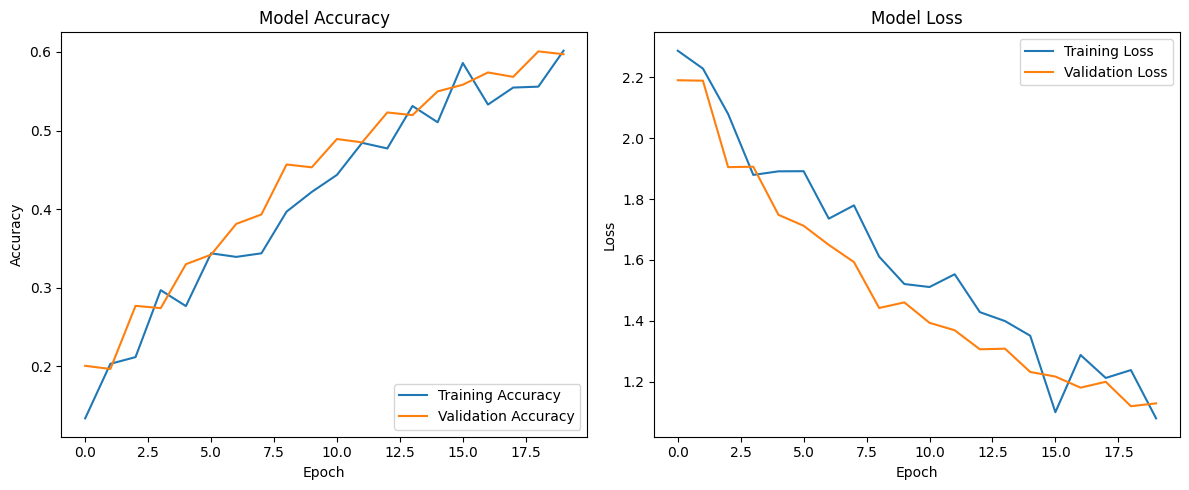

In [56]:
# Plot the learning curve
learning_curve(history)

2.c. Recommend a technique to resolve the issue that you saw on 2.b and implement your recommendation.

  1. By adding Batch Normalization after each convolution layer, should stabilize and speed up training by normalizing the layer inputs.

  2. Using L2 Regularization by adding a small L2 regularization penalty to convolutional layers,  may help prevent overfitting by penalizing large weights. Applied with a regularization factor equal to 0.001 to discourage large weights and help reduce overfitting.

  3. Inserting a Learning Rate Scheduler to decrease the learning rate over time, and may help the model converge more efficiently.  Implemented with LearningRateScheduler, reducing the learning rate by half after 10 epochs to better converge.

Hopefully, these mods can improve training stability and model generalization, to increase accuracy and reduce loss on the training and validation sets.

Epoch 1/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 195s 490ms/step - accuracy: 0.2630 - loss: 2.3317 - val_accuracy: 0.4098 - val_loss: 1.7435 - learning_rate: 0.0050
Epoch 2/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.4453 - loss: 1.6607 - val_accuracy: 0.4203 - val_loss: 1.7106 - learning_rate: 0.0050
Epoch 3/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 186s 474ms/step - accuracy: 0.4437 - loss: 1.6645 - val_accuracy: 0.5122 - val_loss: 1.4877 - learning_rate: 0.0050
Epoch 4/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.4141 - loss: 1.6435 - val_accuracy: 0.4980 - val_loss: 1.5420 - learning_rate: 0.0050
Epoch 5/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 191s 473ms/step - accuracy: 0.5035 - loss: 1.5074 - val_accuracy: 0.4760 - val_loss: 1.5893 - learning_rate: 0.0050
Epoch 6/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.6016 - loss: 1.2721 - val_accuracy: 0.5177 - val_loss: 1.4535 - learning_rate: 0.0050
Epoch 7/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 190s 470ms/step - accuracy: 0.5

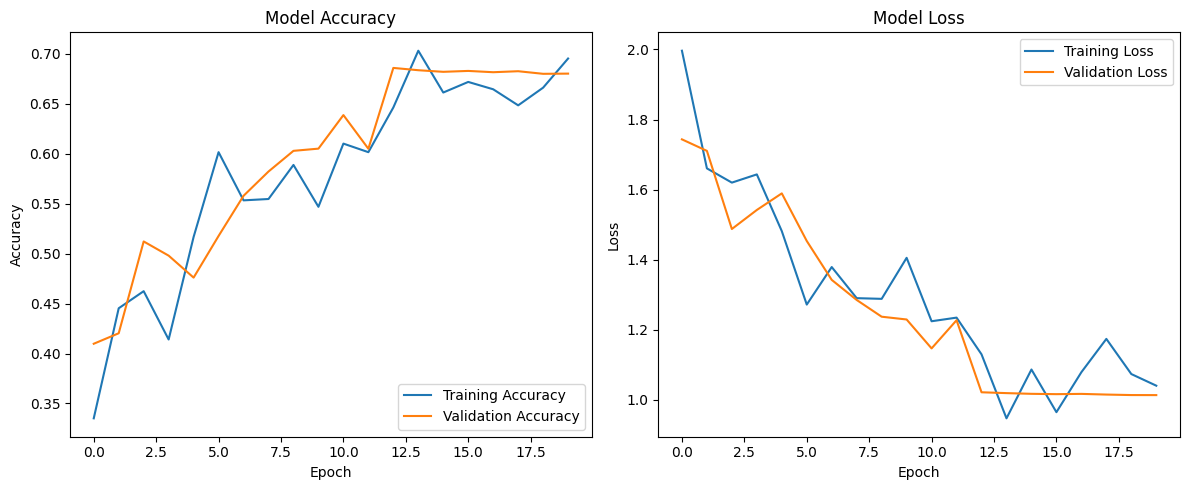

In [57]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler

# Define the CNN model with additional techniques
model = Sequential()

# First convolutional layer with Batch Normalization and L2 regularization
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=x_train.shape[1:], padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer with Batch Normalization and L2 regularization
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional layer with Batch Normalization and L2 regularization
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())

# Fourth convolutional layer with Batch Normalization and L2 regularization
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and add fully connected layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# Output layer (10 classes for CIFAR-10)
model.add(Dense(10, activation='softmax'))

# Compile the model with a learning rate scheduler
optimizer = SGD(learning_rate=0.005, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define a learning rate scheduler function
def lr_scheduler(epoch, lr):
    if epoch > 10:
        lr *= 0.5
    return lr

lr_callback = LearningRateScheduler(lr_scheduler)

# Train the model with augmented data
history = model.fit(datagen.flow(x_train, y_train, batch_size=128),
                    epochs=20,
                    validation_data=(x_test, y_test),
                    steps_per_epoch=len(x_train) // 128,
                    callbacks=[lr_callback])

# Plot the learning curve
learning_curve(history)

Comment: Better but still not great accuracy and loss rate. From about 0.6 to 0.7 accuracy improvement.  Overfitting is not occurring.

2.d. Apply at least two pre-trained models on your data and draw the learning curve.

In [58]:
# implementing VGG16 and ResNet50 models with transfer learning
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import LearningRateScheduler

In [59]:
# Define a function for transfer learning
def create_transfer_model(base_model, input_shape=(32, 32, 3)):
    # Set the base model and freeze its layers
    base_model = base_model(input_shape=input_shape, include_top=False, weights='imagenet')
    base_model.trainable = False

    # Add custom classification layers
    model = Sequential([
        base_model,
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

    # Compile the model
    optimizer = SGD(learning_rate=0.005, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [60]:
# Instantiate and train VGG16-based model
vgg16_model = create_transfer_model(VGG16)
history_vgg16 = vgg16_model.fit(datagen.flow(x_train, y_train, batch_size=128),
                                epochs=20,
                                validation_data=(x_test, y_test),
                                steps_per_epoch=len(x_train) // 128)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 752s 2s/step - accuracy: 0.2085 - loss: 2.1678 - val_accuracy: 0.4330 - val_loss: 1.6173
Epoch 2/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 143s 365ms/step - accuracy: 0.3906 - loss: 1.7572 - val_accuracy: 0.4358 - val_loss: 1.6152
Epoch 3/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 729s 2s/step - accuracy: 0.3805 - loss: 1.7310 - val_accuracy: 0.4821 - val_loss: 1.4712
Epoch 4/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 143s 365ms/step - accuracy: 0.4922 - loss: 1.4447 - val_accuracy: 0.4800 - val_loss: 1.4725
Epoch 5/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 718s 2s/step - accuracy: 0.4240 - loss: 1.6256 - val_accuracy: 0.5030 - val_loss: 1.4196
Epoch 6/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 111s 282ms/step - accuracy: 0.4844 - loss: 1.5224 - val_accuracy: 0.5024 - val_loss: 1.4175
Epoch 7/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 723s 2s/step - accuracy: 0.4464 - loss: 1.5674 - val_accuracy: 0.5131 - val_loss: 1.3829
Epoch 8/20
390/390 ━━━━━━━━━━━━━━━━━━

In [61]:
# Instantiate and train ResNet50-based model
resnet50_model = create_transfer_model(ResNet50)
history_resnet50 = resnet50_model.fit(datagen.flow(x_train, y_train, batch_size=128),
                                      epochs=20,
                                      validation_data=(x_test, y_test),
                                      steps_per_epoch=len(x_train) // 128)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 257s 633ms/step - accuracy: 0.0973 - loss: 2.4412 - val_accuracy: 0.1003 - val_loss: 2.3026
Epoch 2/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 41s 105ms/step - accuracy: 0.0781 - loss: 2.3027 - val_accuracy: 0.1002 - val_loss: 2.3026
Epoch 3/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 244s 624ms/step - accuracy: 0.1006 - loss: 2.3027 - val_accuracy: 0.1003 - val_loss: 2.3026
Epoch 4/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 41s 105ms/step - accuracy: 0.0547 - loss: 2.3034 - val_accuracy: 0.1003 - val_loss: 2.3026
Epoch 5/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 244s 623ms/step - accuracy: 0.0977 - loss: 2.3027 - val_accuracy: 0.1003 - val_loss: 2.3026
Epoch 6/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 40s 103ms/step - accuracy: 0.0859 - loss: 2.3025 - val_accuracy: 0.1003 - val_loss: 2.3026
Epoch 7/20
390/390 ━━━━━━━━━━━━━━━━━━━━ 241s 617ms/step - accuracy: 0.1009 - loss: 2.3028 - val_accuracy: 0.1003 - val_loss: 2.3026
Epoch 8/20
390/390 ━━━━━━━━━

In [62]:
# Function to plot learning curves for both models
def plot_learning_curves(histories, model_names):
    import matplotlib.pyplot as plt

    plt.figure(figsize=(14, 5))
    for i, (history, name) in enumerate(zip(histories, model_names)):
        # Plot accuracy
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label=f'{name} Train')
        plt.plot(history.history['val_accuracy'], label=f'{name} Val')
        plt.title('Model Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot loss
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label=f'{name} Train')
        plt.plot(history.history['val_loss'], label=f'{name} Val')
        plt.title('Model Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

    plt.tight_layout()
    plt.show()

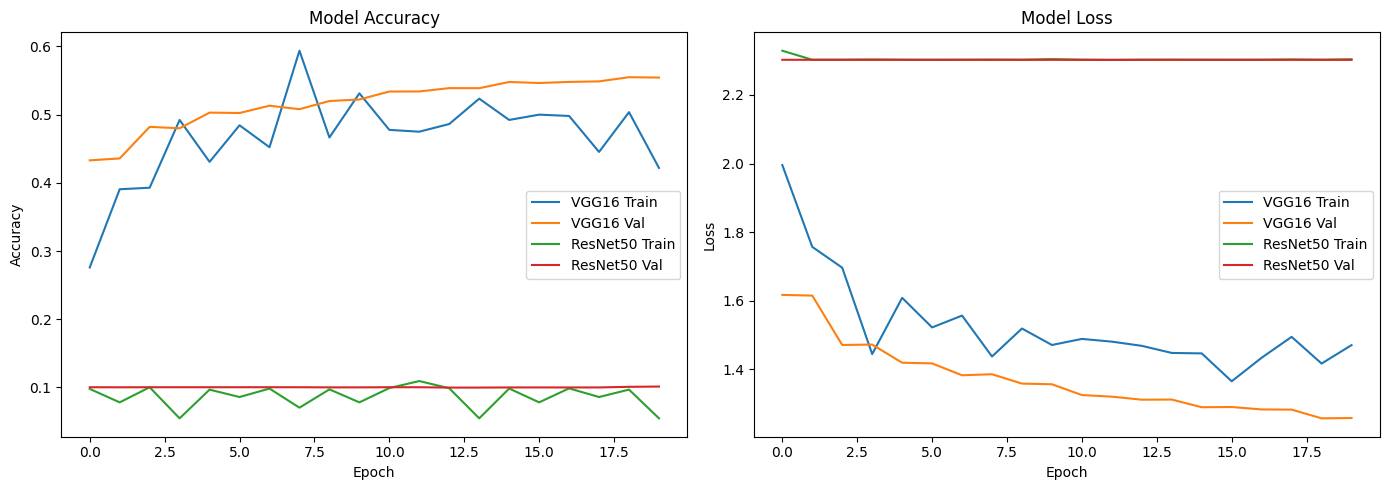

In [63]:
# Plot learning curves
plot_learning_curves([history_vgg16, history_resnet50], ['VGG16', 'ResNet50'])

What is the test accuracy? How do you compare the models?

The accuracy on both pre-trained models are poor.  VGG16 is about 50% accurate and the ResNet50 was about 10% accurate.  The CNN model built in part 2.a. had a much higher accuracy, of about 70%.  This is not clear to as why.  I would have thought that the incentive of using a pre-trained model was to save the time of training and achieving high acuuracy.